### Project 7 : Passenger Satisfaction on SBB (Swiss Federal Railways)

    1. Define a scientific question (e.g. are women better in math?)
     
    2. Simulator. What are the dependencies? How can we modify it so we get different answers? (e.g in one simulator math ability is independent of gender; in another, it depends on educational stimulus, which depends on gender).

    3. Data sources, if any. Data collection methodology, if any. (Otherwise rely on the simulation)
    
    4. Pipeline. How do you process data reliably?
    
    5. Methodology. What machine learning / statistical methods are you using to answer the question? How do you justify them?
    
    6. Summary results: plots, graphs, tables, that can help you answer the question you are interested in.
    
    7. Conclusion based on your results. Can you answer the question? If not, why not?


### Sources intéressantes

- Influence du genre sur le salaire: https://www.ebg.admin.ch/fr/les-raisons-des-ecarts-salariaux-entre-les-femmes-et-les-hommes

- Salaires Moyens : https://www.bfs.admin.ch/bfs/fr/home/statistiques/travail-remuneration/salaires-revenus-cout-travail.html
- Durée : https://www.bfs.admin.ch/bfs/fr/home/statistiques/mobilite-transports/transport-personnes/comportements-transports/distance-duree-jour-deplacements.html
- Fréquence : https://www.bav.admin.ch/bav/fr/home/modes-de-transport/chemin-de-fer/transport-des-voyageurs.html
- Propreté :https://www.bav.admin.ch/bav/fr/home/themes-generaux/trv/systeme-de-mesure-de-la-qualite.html (je trouve inutile de l'ajouter, car la proprété est globalement très bonne en Suisse)


### TODO:
 - Changer les relations entre les variables afin d'avoir des résultats différents (Simplifier mon implémentation)
 - Faire un graph des changements
 - Essayer Knn et MLP

# **But :**
Notre objectif est de développer un modèle de classification qui prédit si un passager est satisfait ou insatisfait, en fonction de différents critères liés aux services des CFF.

# **Variables choisies :**
Les variables que nous avons sélectionnées incluent des aspects comme :

* Surpopulation (Overcrowding)  
* Prix des billets (Price)
* Ponctualité (Punctuality)
* Durée du voyage (Duration)
* Fréquence des trajets (Frequency)
* Revenu (Income)
* Possession d’une voiture (Has Car)
* Genre (Gender)
* Nombre de jours de télétravail (Remote Working Days)
* Âge (Age)

### Graph dependecies

In [1]:
import graphviz

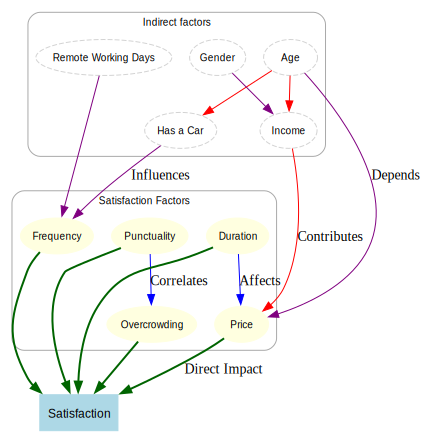

In [2]:
from graphviz import Digraph

# Create a Digraph object
dot = Digraph('Passenger Satisfaction')
dot.attr(rankdir='TB', size='7,9')  # Vertical layout, larger canvas for hierarchy

# Define node styles
dot.attr('node', shape='box', style='filled', color='lightblue', fontname='Helvetica', fontsize='12')
dot.node('S', 'Satisfaction')

# Factors directly affecting satisfaction
dot.attr('node', shape='ellipse', style='filled', color='lightyellow', fontname='Helvetica', fontsize='10')
dot.node('P', 'Price')
dot.node('U', 'Punctuality')
dot.node('D', 'Duration')
dot.node('F', 'Frequency')
dot.node('O', 'Overcrowding')

# Indirect factors
dot.attr('node', shape='ellipse', style='dashed', color='lightgray', fontname='Helvetica', fontsize='10')
dot.node('A', 'Age')
dot.node('G', 'Gender')
dot.node('I', 'Income')
dot.node('R', 'Remote Working Days')
dot.node('C', 'Has a Car')

# Organize clusters
with dot.subgraph(name='cluster_independent') as c:
    c.attr(label='Indirect factors', style='rounded', color='darkgray', fontname='Helvetica', fontsize='10')
    c.node('A')
    c.node('G')
    c.node('I')
    c.node('R')
    c.node('C')

with dot.subgraph(name='cluster_factors') as c:
    c.attr(label='Satisfaction Factors', style='rounded', color='darkgray', fontname='Helvetica', fontsize='10')
    c.node('P')
    c.node('U')
    c.node('D')
    c.node('F')
    c.node('O')

# Add edges for satisfaction factors
dot.edge('P', 'S', color='darkgreen', penwidth='2', label='Direct Impact')
dot.edge('U', 'S', color='darkgreen', penwidth='2')
dot.edge('D', 'S', color='darkgreen', penwidth='2')
dot.edge('F', 'S', color='darkgreen', penwidth='2')
dot.edge('O', 'S', color='darkgreen', penwidth='2')

# Relationships among features
dot.edge('D', 'P', color='blue', label='Affects')
dot.edge('U', 'O', color='blue', label='Correlates')

dot.edge('A', 'P', color='purple', label='Depends')
dot.edge('C', 'F', color='purple', label='Influences')
dot.edge('G', 'I', color='purple')
dot.edge('R', 'F', color='purple')

dot.edge('I', 'P', color='red', label='Contributes')
dot.edge('A', 'I', color='red')
dot.edge('A', 'C', color='red')

# Render the graph
dot

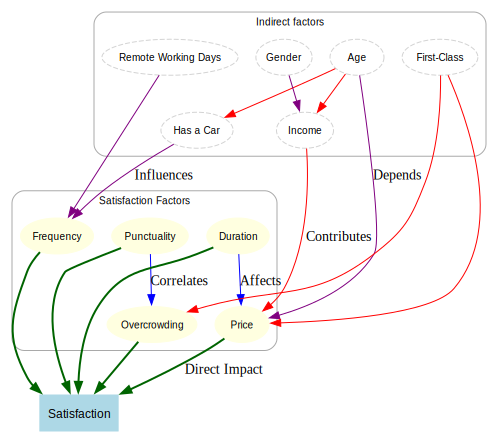

In [3]:
from graphviz import Digraph

# Create a Digraph object
dot = Digraph('Passenger Satisfaction')
dot.attr(rankdir='TB', size='7,9')  # Vertical layout, larger canvas for hierarchy

# Define node styles
dot.attr('node', shape='box', style='filled', color='lightblue', fontname='Helvetica', fontsize='12')
dot.node('S', 'Satisfaction')

# Factors directly affecting satisfaction
dot.attr('node', shape='ellipse', style='filled', color='lightyellow', fontname='Helvetica', fontsize='10')
dot.node('P', 'Price')
dot.node('U', 'Punctuality')
dot.node('D', 'Duration')
dot.node('F', 'Frequency')
dot.node('O', 'Overcrowding')

# Indirect factors
dot.attr('node', shape='ellipse', style='dashed', color='lightgray', fontname='Helvetica', fontsize='10')
dot.node('A', 'Age')
dot.node('G', 'Gender')
dot.node('I', 'Income')
dot.node('R', 'Remote Working Days')
dot.node('C', 'Has a Car')
dot.node('1', 'First-Class')

# Organize clusters
with dot.subgraph(name='cluster_independent') as c:
    c.attr(label='Indirect factors', style='rounded', color='darkgray', fontname='Helvetica', fontsize='10')
    c.node('A')
    c.node('G')
    c.node('I')
    c.node('R')
    c.node('C')
    c.node('1')

with dot.subgraph(name='cluster_factors') as c:
    c.attr(label='Satisfaction Factors', style='rounded', color='darkgray', fontname='Helvetica', fontsize='10')
    c.node('P')
    c.node('U')
    c.node('D')
    c.node('F')
    c.node('O')

# Add edges for satisfaction factors
dot.edge('P', 'S', color='darkgreen', penwidth='2', label='Direct Impact')
dot.edge('U', 'S', color='darkgreen', penwidth='2')
dot.edge('D', 'S', color='darkgreen', penwidth='2')
dot.edge('F', 'S', color='darkgreen', penwidth='2')
dot.edge('O', 'S', color='darkgreen', penwidth='2')

# Relationships among features
dot.edge('D', 'P', color='blue', label='Affects')
dot.edge('U', 'O', color='blue', label='Correlates')

dot.edge('A', 'P', color='purple', label='Depends')
dot.edge('C', 'F', color='purple', label='Influences')
dot.edge('G', 'I', color='purple')
dot.edge('R', 'F', color='purple')

dot.edge('I', 'P', color='red', label='Contributes')
dot.edge('A', 'I', color='red')
dot.edge('A', 'C', color='red')
dot.edge('1', 'O', color='red')
dot.edge('1', 'P', color='red')

# Render the graph
dot

### Data generation

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from GenerativeModel import *

In [28]:
#seed
np.random.seed(1)

In [29]:
#generation of synthethic data
def generate_data(size):
    sim_complex = ComplexDependentSatisfaction(size)
    sim_impact = ImpactOnOvercrowding(size)
    return sim_complex, sim_impact

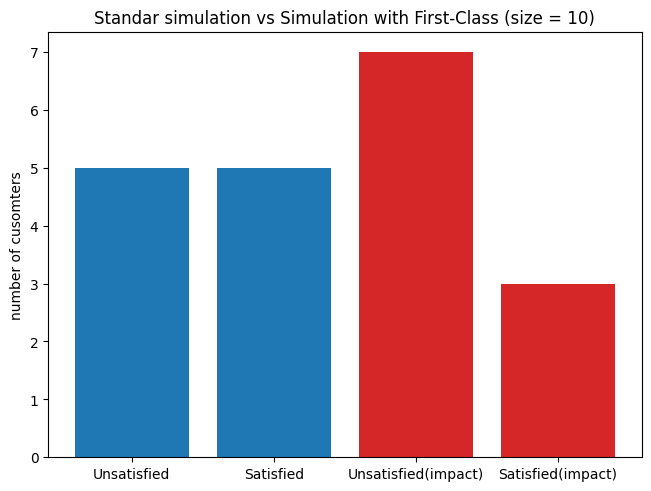

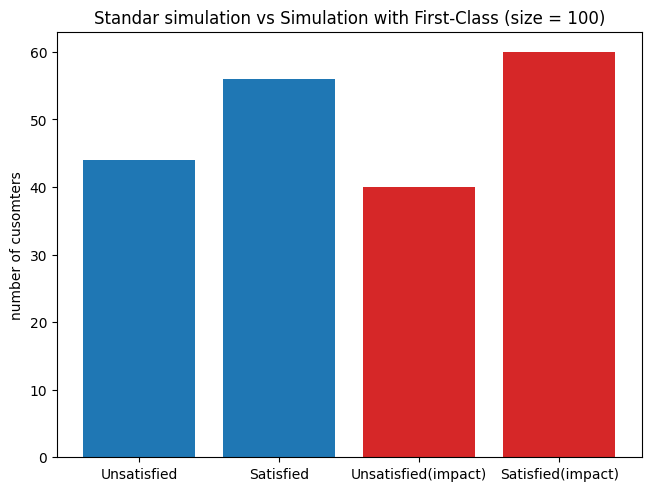

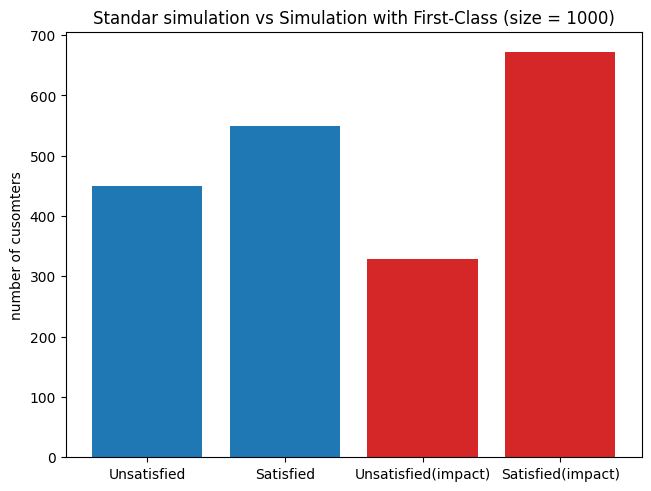

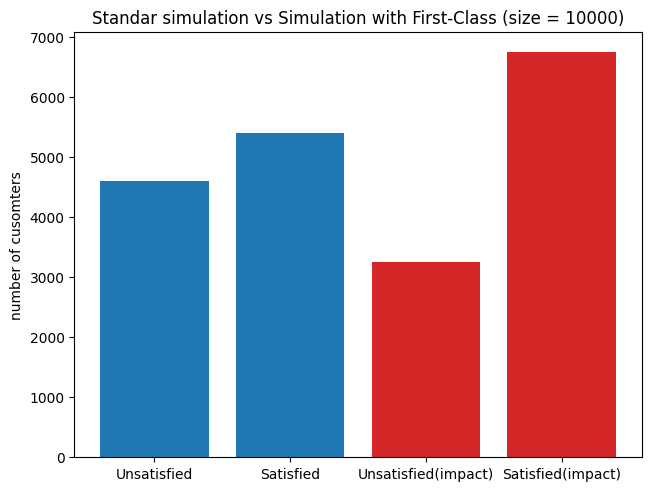

In [30]:
for el in [10, 100, 1000, 10000]:
    sim_complex, sim_impact = generate_data(el)
    data_complex = sim_complex.df
    data_impact = sim_impact.df
    
    satisf_complex = data_complex['Satisfaction'].value_counts()
    satisf_impact = data_impact['Satisfaction'].value_counts()
    
    fig, ax = plt.subplots(layout="constrained")
    bar_colors = ['tab:blue', 'tab:blue', 'tab:red', 'tab:red']
    ax.bar(["Unsatisfied", "Satisfied", "Unsatisfied(impact)", "Satisfied(impact)"], 
           [satisf_complex['0'], satisf_complex['1'],
           satisf_impact['0'], satisf_impact['1']], color=bar_colors)
    ax.set_ylabel("number of cusomters")
    ax.set_title(f"Standar simulation vs Simulation with First-Class (size = {el})")
    plt.show()


### Simple Pipeline

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [32]:
numeric_features = [ "Age", "Income", "Remote Working Days",
                    "Price", "Punctuality", "Duration", "Frequency",
                    "Overcrowding"]
numeric_transformer = Pipeline(
    steps=[("scaler", MinMaxScaler())]
)

categorical_features = ["Has Car", "Gender"]
categorical_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder())
    ]
)
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)


In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

In [34]:
def simple_pipeline(simulator, data_size):
    np.random.seed(1)
    gen = simulator(data_size)
    data = gen.df
    
    X = data.copy().drop(['Satisfaction'], axis=1)
    y = data['Satisfaction']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
    
    def my_pipeline(model, preprocessor):
        clf = Pipeline(
        steps=[("preprocessor", preprocessor),
               ("classifier", model)]
        )
        clf.fit(X_train, y_train)
        return clf.score(X_test, y_test)

    score_random_forest = my_pipeline(RandomForestClassifier(), preprocessor)
    score_logistic = my_pipeline(LogisticRegression(), preprocessor)
    score_perceptron = my_pipeline(Perceptron(), preprocessor)
    score_knn = my_pipeline(KNeighborsClassifier(), preprocessor)
    
    print(f"Simulator = {gen}, Size of data = {data_size}")
    print(f"Accuracy score for Random Forest Classifier: {score_random_forest:.4f}")
    print(f"Accuracy score for Logistic Regression: {score_logistic:.4f}")
    print(f"Accuracy score for Single Layer Perceptron: {score_perceptron:.4f}")
    print(f"Accuracy score for KNeighborsClassifier: {score_knn:.4f}")

In [53]:
for el in [10, 100, 1000, 10000, 100000]:
    simple_pipeline(ComplexDependentSatisfaction, el)
    print()
    simple_pipeline(ImpactOnOvercrowding, el)
    print("---------------------------------")
    

Simulator = ComplexDependentSatisfaction, Size of data = 10
Accuracy score for Random Forest Classifier: 0.2500
Accuracy score for Logistic Regression: 0.2500
Accuracy score for Single Layer Perceptron: 0.2500
Accuracy score for KNeighborsClassifier: 0.2500

Simulator = ImpactOnOvercrowding, Size of data = 10
Accuracy score for Random Forest Classifier: 0.7500
Accuracy score for Logistic Regression: 0.7500
Accuracy score for Single Layer Perceptron: 0.7500
Accuracy score for KNeighborsClassifier: 0.7500
---------------------------------
Simulator = ComplexDependentSatisfaction, Size of data = 100
Accuracy score for Random Forest Classifier: 0.7273
Accuracy score for Logistic Regression: 0.7273
Accuracy score for Single Layer Perceptron: 0.7273
Accuracy score for KNeighborsClassifier: 0.7576

Simulator = ImpactOnOvercrowding, Size of data = 100
Accuracy score for Random Forest Classifier: 0.9394
Accuracy score for Logistic Regression: 0.8485
Accuracy score for Single Layer Perceptron: 0

### Feature selection

#### Why feature selection ?

Because we need to be certain that the results match the simulation. So we do this principally to check if our the results make sense in regard of the simulation. 

In [178]:
# RFE
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

def RFE_model(data):
    # Define the model using linear regression
    model = LogisticRegression()

    # Define RFE with the model and specify the number of features to select
    rfe = RFE(model, n_features_to_select=5)

    # Separate features and target variable
    X = data.drop(columns=['Satisfaction'])
    y = data['Satisfaction']

    scale = MinMaxScaler()
    X_minmax = scale.fit_transform(X)
    # Fit RFE to the data
    rfe.fit(X_minmax, y)

    # Get the ranking of features
    feature_ranking = pd.DataFrame({
        'feature': X.columns,
        'rank': rfe.ranking_
    }).sort_values(by='rank')

    print(feature_ranking)
    return feature_ranking

In [179]:
from GenerativeModel import ComplexDependentSatisfaction

In [180]:
# Generation of synthetic data
gen = ComplexDependentSatisfaction(1000)
data = gen.df

In [181]:
data['Gender'] = data['Gender'].map({'M': 1, 'F': 0})
data['Has Car'] = data['Has Car'].map({'yes': 1, 'no': 0})
data.head()

,Age,Gender,Income,Remote Working Days,Has Car,Price,Punctuality,Duration,Frequency,Overcrowding,Satisfaction
0,90,1,84000,4,0,3,5,3,0,3,1
1,60,1,84000,0,0,4,5,4,5,1,1
2,60,0,84000,3,0,4,4,4,0,5,0
3,60,1,84000,5,0,2,2,5,1,5,0
4,60,0,109000,0,0,5,2,5,2,5,0


In [182]:
from sklearn.ensemble import RandomForestClassifier

# Filter method
sizes = [10, 100, 1000, 10000]
length = len(sizes)
corr_results_complex = list()
corr_results_impact = list()
RFE_results_complex = list()
RFE_results_impact = list()
random_forest_results_complex = list()
random_forest_results_impact = list()
for i in range(length):
    data_size = sizes[i]
    sim_complex, sim_impact = generate_data(data_size)
    
    data_complex = sim_complex.df
    data_complex['Gender'] = data_complex['Gender'].map({'M': 1, 'F': 0})
    data_complex['Has Car'] = data_complex['Has Car'].map({'yes': 1, 'no': 0})
    
    data_impact = sim_impact.df
    data_impact['Gender'] = data_impact['Gender'].map({'M': 1, 'F': 0})
    data_impact['Has Car'] = data_impact['Has Car'].map({'yes': 1, 'no': 0})
    
    # filer method
    correlations_complex = data_complex.corr()['Satisfaction'].abs().sort_values(ascending=False)
    corr_results_complex.append(correlations_complex)
    
    correlations_impact = data_impact.corr()['Satisfaction'].abs().sort_values(ascending=False)
    corr_results_impact.append(correlations_impact)
    
    # Random Forest
    X_complex = data_complex.drop(columns=['Satisfaction'])
    y_complex = data_complex['Satisfaction']

    X_impact = data_impact.drop(columns=['Satisfaction'])
    y_impact = data_impact['Satisfaction']
    
    scale = MinMaxScaler()
    X_complex_minmax = scale.fit_transform(X_complex)
    X_impact_minmax = scale.fit_transform(X_impact)
    
    # Train a Random Forest model
    model_complex = RandomForestClassifier()
    model_impact = RandomForestClassifier()
    model_complex.fit(X_complex_minmax, y_complex)
    model_impact.fit(X_impact_minmax, y_impact)
    

    # Get feature importances
    importances_complex = pd.DataFrame({
        'feature': X_complex.columns,
        'importance': model_complex.feature_importances_
    }).sort_values(by='importance', ascending=False)
    
    importances_impact = pd.DataFrame({
        'feature': X_impact.columns,
        'importance': model_impact.feature_importances_
    }).sort_values(by='importance', ascending=False)

    random_forest_results_complex.append(importances_complex)
    random_forest_results_impact.append(importances_impact)
    print("+++++++++++++++++++++++++++++++")
    print("Size of the simulations: ", data_size)
    print("+++++++++++++++++++++++++++++++\n")
    print("-------- Filter method --------")
    print(f"Simulation: {sim_complex}")
    print('correlation:',correlations_complex, '\n')
    print(f"Simulation: {sim_impact}")
    print('correlation:',correlations_impact)
    print()
    # RFE
    print("------------- RFE -------------")
    print(f"Simulation: {sim_complex}")
    RFE_results_complex.append(RFE_model(data_complex)) # RFE with top 3 features selected
    print()
    print(f"Simulation: {sim_impact}")
    RFE_results_impact.append(RFE_model(data_impact))
    print()
    print("-------- Random Forest --------")
    print(f"Simulation: {sim_complex}")
    print(importances_complex)
    print()
    print(f"Simulation: {sim_impact}")
    print(importances_impact)
    print()
    

+++++++++++++++++++++++++++++++
Size of the simulations:  10
+++++++++++++++++++++++++++++++

-------- Filter method --------
Simulation: ComplexDependentSatisfaction
correlation: Satisfaction           1.000000
Overcrowding           0.801784
Punctuality            0.480384
Age                    0.327777
Remote Working Days    0.310460
Income                 0.202641
Duration               0.166667
Has Car                0.166667
Frequency              0.117309
Gender                 0.089087
Price                  0.029161
Name: Satisfaction, dtype: float64 

Simulation: ImpactOnOvercrowding
correlation: Satisfaction           1.000000
Overcrowding           0.509175
Remote Working Days    0.412532
First-Class            0.408248
Gender                 0.333333
Punctuality            0.333333
Price                  0.301511
Frequency              0.259259
Has Car                0.218218
Income                 0.198899
Duration               0.166667
Age                    0.025641
N

In [192]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

n_splits = 10
cv = KFold(n_splits=n_splits, shuffle=True, random_state=42)

X_complex = data_complex.drop(columns=['Satisfaction'])
y_complex = data_complex['Satisfaction']

X_impact = data_impact.drop(columns=['Satisfaction'])
y_impact = data_impact['Satisfaction']

scale = MinMaxScaler()
X_complex_minmax = scale.fit_transform(X_complex)
X_impact_minmax = scale.fit_transform(X_impact)

# Logistic regression with cross validation without feature selection 
log_reg = LogisticRegression(max_iter=200)

log_reg_scores_complex = cross_val_score(
    log_reg, X_complex_minmax, y_complex, scoring='accuracy', cv=cv, n_jobs=-1)

log_reg_scores_impact = cross_val_score(
    log_reg, X_impact_minmax, y_impact, scoring='accuracy', cv=cv, n_jobs=-1)

print(f'Simulator: ComplexDependentSatisfaction, Accuracy without feature selection: {np.mean(log_reg_scores_complex):.6f}')
print(f'Simulator: ImpactOnOvercrowding, Accuracy without feature selection: {np.mean(log_reg_scores_impact):.6f}\n')

# Model with selected features (top 5 from RFE)
feature_ranking_complex = RFE_results_complex[3]
feature_ranking_impact = RFE_results_impact[3]

selected_features_complex = feature_ranking_complex[feature_ranking_complex['rank'] == 1]['feature']
selected_features_impact = feature_ranking_impact[feature_ranking_impact['rank'] == 1]['feature']

X_complex_selected = X_complex[selected_features_complex]
X_impact_selected = X_impact[selected_features_impact]

scale = MinMaxScaler()
X_complex_selected_minmax = scale.fit_transform(X_complex_selected)
X_impact_selected_minmax = scale.fit_transform(X_impact_selected)

log_reg_scores_complex = cross_val_score(
    log_reg, X_complex_selected_minmax, y_complex, scoring='accuracy', cv=cv, n_jobs=-1)

log_reg_scores_impact = cross_val_score(
    log_reg, X_impact_selected_minmax, y_impact, scoring='accuracy', cv=cv, n_jobs=-1)


print(f'Simulator: ComplexDependentSatisfaction, Accuracy with feature selection (RFE): {np.mean(log_reg_scores_complex):.6f}')
print(f'Simulator: ImpactOnOvercrowding, Accuracy with feature selection (RFE): {np.mean(log_reg_scores_impact):.6f}\n')

correlations_selection_complex = corr_results_complex[3]
correlations_selection_impact = corr_results_impact[3]

corr_complex_selected_features = correlations_selection_complex[correlations_selection_complex.values > .1][1:].index
X_complex_selected = X_complex[corr_complex_selected_features]

corr_impact_selected_features = correlations_selection_impact[correlations_selection_impact.values > .1][1:].index
X_impact_selected = X_impact[corr_impact_selected_features]

scale = MinMaxScaler()
X_complex_selected_minmax = scale.fit_transform(X_complex_selected)
X_impact_selected_minmax = scale.fit_transform(X_impact_selected)

log_reg_scores_complex = cross_val_score(
    log_reg, X_complex_selected_minmax, y_complex, scoring='accuracy', cv=cv, n_jobs=-1)

log_reg_scores_impact = cross_val_score(
    log_reg, X_impact_selected_minmax, y_impact, scoring='accuracy', cv=cv, n_jobs=-1)

print(f'Simulator: ComplexDependentSatisfaction, Accuracy with feature selection (filter method): {np.mean(log_reg_scores_complex):.6f}')
print(f'Simulator: ImpactOnOvercrowding, Accuracy with feature selection (filter method): {np.mean(log_reg_scores_impact):.6f}\n')

# Model with selected features (Random Forest)
importances_complex = random_forest_results_complex[3]
importances_impact = random_forest_results_impact[3]
rf_selected_features_complex = importances_complex[importances_complex['importance'] > 0.05]['feature']
rf_selected_features_impact = importances_impact[importances_impact['importance'] > 0.05]['feature']

X_complex_selected = X_complex[rf_selected_features_complex]
X_impact_selected = X_impact[rf_selected_features_impact]

X_complex_selected_minmax = scale.fit_transform(X_complex_selected)
X_impact_selected_minmax = scale.fit_transform(X_impact_selected)

log_reg_scores_complex = cross_val_score(
    log_reg, X_complex_selected_minmax, y_complex, scoring='accuracy', cv=cv, n_jobs=-1)

log_reg_scores_impact = cross_val_score(
    log_reg, X_impact_selected_minmax, y_impact, scoring='accuracy', cv=cv, n_jobs=-1)


print(f'Simulator: ComplexDependentSatisfaction, Accuracy with feature selection (Random Forest): {np.mean(log_reg_scores_complex):.6f}')
print(f'Simulator: ImpactOnOvercrowding, Accuracy with feature selection (Random Forest): {np.mean(log_reg_scores_impact):.6f}\n')

Simulator: ComplexDependentSatisfaction, Accuracy without feature selection: 0.840600
Simulator: ImpactOnOvercrowding, Accuracy without feature selection: 0.854700

Simulator: ComplexDependentSatisfaction, Accuracy with feature selection (RFE): 0.840800
Simulator: ImpactOnOvercrowding, Accuracy with feature selection (RFE): 0.856000

Simulator: ComplexDependentSatisfaction, Accuracy with feature selection (filter method): 0.841700
Simulator: ImpactOnOvercrowding, Accuracy with feature selection (filter method): 0.848800

Simulator: ComplexDependentSatisfaction, Accuracy with feature selection (Random Forest): 0.841200
Simulator: ImpactOnOvercrowding, Accuracy with feature selection (Random Forest): 0.851100



In [196]:
accuracies_complex = np.zeros(X.shape[1])
accuracies_impact = np.zeros(X.shape[1])

for i in range (1, X.shape[1] + 1):
    model = LogisticRegression()
    rfe_complex = RFE(model, n_features_to_select=i)
    rfe_complex.fit(X_complex_minmax, y_complex)

    # Get the ranking of features
    feature_ranking_complex = pd.DataFrame({
        'feature': X_complex.columns,
        'rank': rfe_complex.ranking_
    }).sort_values(by='rank')

    rfe = RFE(model, n_features_to_select=i)
    rfe.fit(X_impact_minmax, y_impact)
    
    feature_ranking_impact = pd.DataFrame({
        'feature': X_impact.columns,
        'rank': rfe.ranking_
    }).sort_values(by='rank')
    
    # top i from RFE
    selected_features_complex = feature_ranking_complex[feature_ranking_complex['rank'] == 1]['feature']
    selected_features_impact = feature_ranking_impact[feature_ranking_impact['rank'] == 1]['feature']

    X_complex_selected = X_complex[selected_features_complex]
    X_impact_selected = X_impact[selected_features_impact]

    scale = MinMaxScaler()
    X_complex_selected_minmax = scale.fit_transform(X_complex_selected)
    X_impact_selected_minmax = scale.fit_transform(X_impact_selected)

    log_reg_scores_complex = cross_val_score(
        log_reg, X_complex_selected_minmax, y_complex, scoring='accuracy', cv=cv, n_jobs=-1)

    log_reg_scores_impact = cross_val_score(
        log_reg, X_impact_selected_minmax, y_impact, scoring='accuracy', cv=cv, n_jobs=-1)

    accuracies_complex[i - 1] = np.mean(log_reg_scores_complex)
    accuracies_impact[i - 1] = np.mean(log_reg_scores_impact)

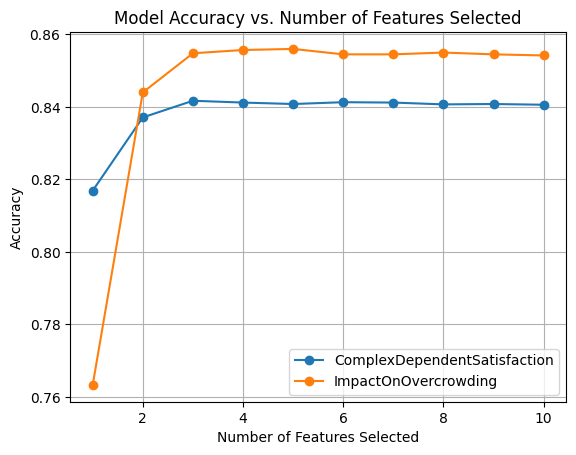

In [201]:
# Plot accuracy vs. number of features
plt.plot(np.arange(1, X.shape[1] + 1), accuracies_complex, marker='o')
plt.plot(np.arange(1, X.shape[1] + 1), accuracies_impact, marker='o')
plt.legend(["ComplexDependentSatisfaction", "ImpactOnOvercrowding"])
plt.xlabel("Number of Features Selected")
plt.ylabel("Accuracy")
plt.title("Model Accuracy vs. Number of Features Selected")
plt.grid()
plt.show()

In [202]:
i = np.argmax(accuracies_complex)
j = np.argmax(accuracies_impact)

print(f"Simulator: {sim_complex} Max accuracy is {accuracies_complex[i]}, with {i + 1} features selected !")
print(f"Simulator: {sim_impact} Max accuracy is {accuracies_impact[j]}, with {i + 1} features selected !")

Simulator: ComplexDependentSatisfaction Max accuracy is 0.8417, with 3 features selected !
Simulator: ImpactOnOvercrowding Max accuracy is 0.8559999999999999, with 3 features selected !


### Feature Importance Across Selection Methods (J'aime pas trop)

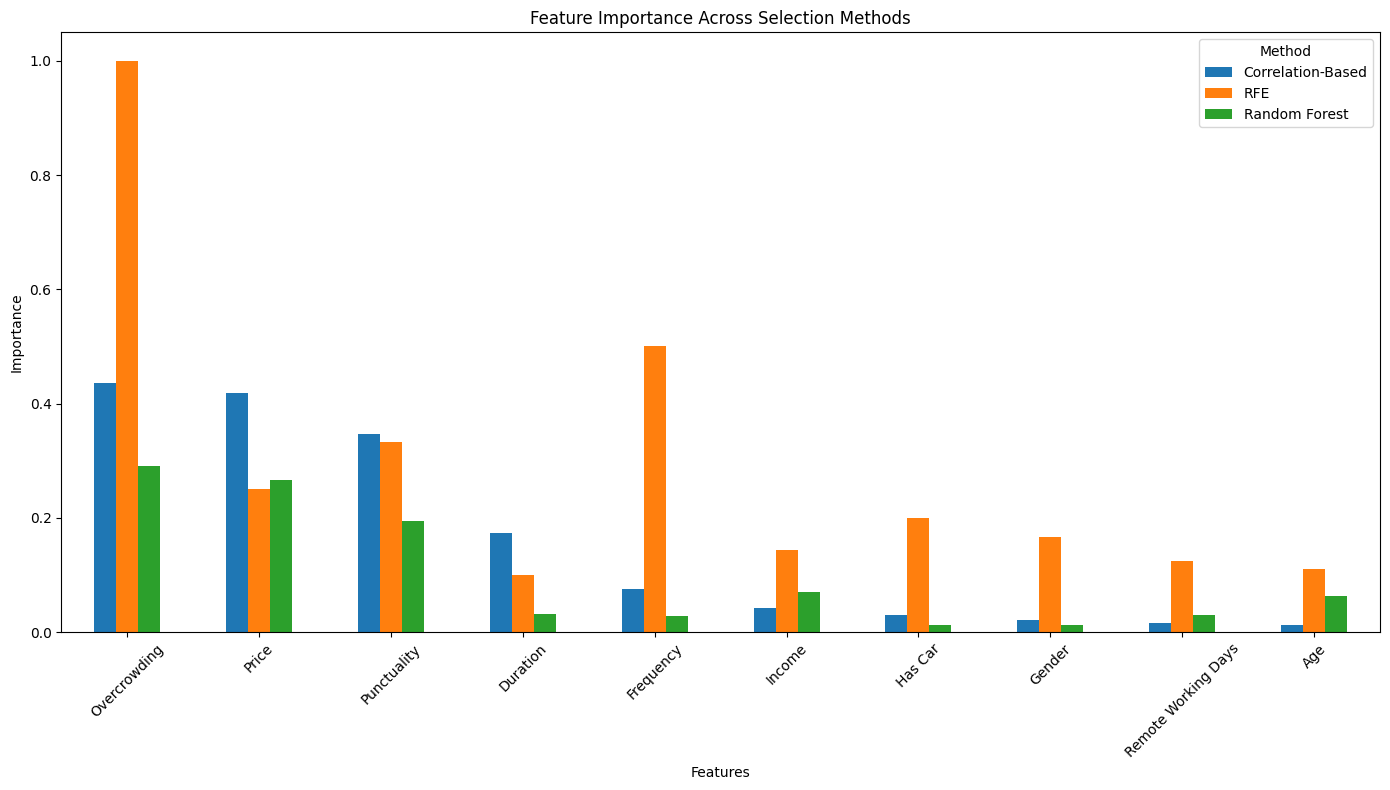

In [187]:
# New extracted features and their importance values
features = [
    "Overcrowding", "Price", "Punctuality", "Duration", "Frequency",
    "Income", "Has Car", "Gender", "Remote Working Days", "Age"
]

# Correlation-Based Importance
correlation_importance = [
    0.435196, 0.418901, 0.346210, 0.174066, 0.075954,
    0.041293, 0.029084, 0.021831, 0.015452, 0.012124
]

# RFE-Based Importance (inverse of rank for better visualization)
rfe_ranking = [1,4,3,10,2,7,5,6,8,9]
rfe_importance = [1 / rank if rank != 0 else 0 for rank in rfe_ranking]

# Random Forest-Based Importance
random_forest_importance = [
    0.290783, 0.266373, 0.194532, 0.032256, 0.028560,
    0.070537, 0.011941, 0.012852, 0.029607, 0.062559
]

# DataFrame
importance_df = pd.DataFrame({
    'Feature': features,
    'Correlation-Based': correlation_importance,
    'RFE': rfe_importance,
    'Random Forest': random_forest_importance
})

# Bar plots for feature importance changes
importance_df.set_index('Feature').plot(kind='bar', figsize=(14, 8))
plt.title("Feature Importance Across Selection Methods")
plt.ylabel("Importance")
plt.xlabel("Features")
plt.xticks(rotation=45)
plt.legend(title="Method")
plt.tight_layout()
plt.show()

### Tree based methods

In [188]:
from GenerativeModel import ComplexDependentSatisfaction
# Generation of synthetic data
np.random.seed(1)
gen = ComplexDependentSatisfaction(10000)
data = gen.df
data['Gender'] = data['Gender'].map({'M': 1, 'F': 0})
data['Has Car'] = data['Has Car'].map({'yes': 1, 'no': 0})
data.head()

,Age,Gender,Income,Remote Working Days,Has Car,Price,Punctuality,Duration,Frequency,Overcrowding,Satisfaction
0,60,0,60000,4,0,5,5,4,1,4,1
1,15,1,1000,3,0,2,4,3,3,4,1
2,60,1,109000,3,0,5,5,5,3,5,0
3,90,0,109000,4,1,5,5,5,0,4,0
4,15,1,1000,2,0,3,4,4,1,5,0


In [189]:
from sklearn.metrics import log_loss
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import mean_squared_error

X = gen.df.drop(columns=["Satisfaction"])
y = gen.df["Satisfaction"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

tryhout_lenght = 10
lr_multiplier = tryhout_lenght / (tryhout_lenght * 10)

decision_tree_acc = np.zeros(tryhout_lenght)
random_forest_acc = np.zeros(tryhout_lenght)
ada_boost_acc = np.zeros(tryhout_lenght)

decision_tree_log_loss = np.zeros(tryhout_lenght)
random_forest_log_loss = np.zeros(tryhout_lenght)
ada_boost_log_loss = np.zeros(tryhout_lenght)


for i in range(1, tryhout_lenght + 1):
    decision_tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=i, random_state=0)
    random_forest_clf = RandomForestClassifier(n_estimators=100, max_features='sqrt', max_depth=i, random_state=0)
    ada_boost_clf = AdaBoostClassifier(n_estimators=100, learning_rate=i * lr_multiplier, algorithm='SAMME', random_state=0)

    decision_tree_clf.fit(X_train, y_train)
    random_forest_clf.fit(X_train, y_train)
    ada_boost_clf.fit(X_train, y_train)

    decision_tree_y_pred = decision_tree_clf.predict(X_test)
    random_forest_y_pred = random_forest_clf.predict(X_test)
    ada_boost_y_pred = ada_boost_clf.predict(X_test)

    decision_tree_y_proba = decision_tree_clf.predict_proba(X_test)
    random_forest_y_proba = random_forest_clf.predict_proba(X_test)
    ada_boost_y_proba = ada_boost_clf.predict_proba(X_test)

    decision_tree_acc[i - 1] = accuracy_score(y_test, decision_tree_y_pred)
    random_forest_acc[i - 1] = accuracy_score(y_test, random_forest_y_pred)
    ada_boost_acc[i - 1] = accuracy_score(y_test, ada_boost_y_pred)

    decision_tree_log_loss[i - 1] = log_loss(y_test, decision_tree_y_proba)
    random_forest_log_loss[i - 1] = log_loss(y_test, random_forest_y_proba)
    ada_boost_log_loss[i - 1] = log_loss(y_test, ada_boost_y_proba)

best_dt_index = np.argmax(decision_tree_acc)
best_rf_index = np.argmax(random_forest_acc)
best_ada_index = np.argmax(ada_boost_acc)

print(f"best accuracy for Decision Tree Classifier : {decision_tree_acc[best_dt_index]}")
print(f"best accuracy for Random Forest Classifier : {random_forest_acc[best_rf_index]}")
print(f"best accuracy for Ada Boost Classifier : {ada_boost_acc[best_ada_index]}")

best accuracy for Decision Tree Classifier : 0.852
best accuracy for Random Forest Classifier : 0.841
best accuracy for Ada Boost Classifier : 0.8433333333333334


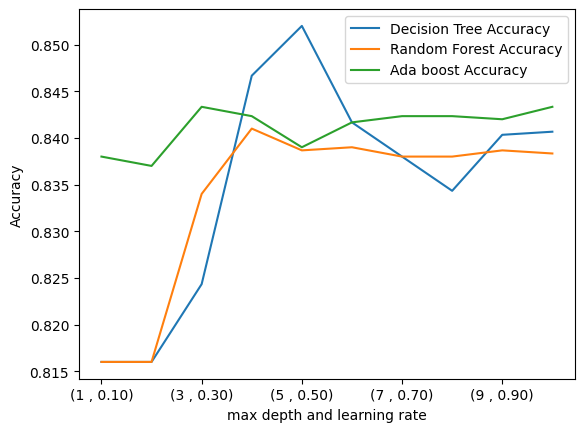

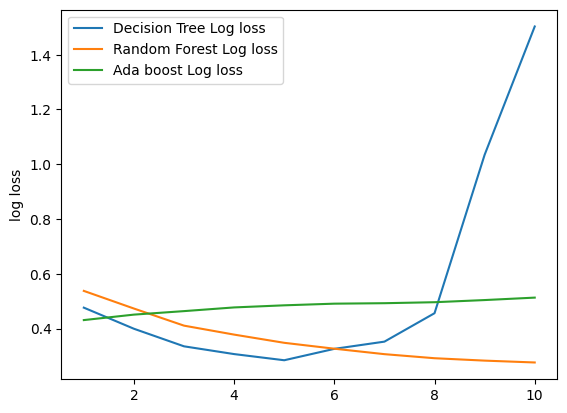

In [190]:
x_axis = np.arange(1, tryhout_lenght + 1, 1)
x_axis_l = np.arange(1, tryhout_lenght + 1, 2)


plt.plot(x_axis, decision_tree_acc)
plt.plot(x_axis, random_forest_acc)
plt.plot(x_axis, ada_boost_acc)

plt.xticks(ticks=x_axis_l, labels=[f"({i} , {i*lr_multiplier:.2f})" for i in x_axis_l])
plt.legend(["Decision Tree Accuracy", "Random Forest Accuracy", "Ada boost Accuracy"])
plt.xlabel("max depth and learning rate")
plt.ylabel("Accuracy")
plt.show()

plt.plot(x_axis, decision_tree_log_loss)
plt.plot(x_axis, random_forest_log_loss)
plt.plot(x_axis, ada_boost_log_loss)
plt.ylabel("log loss")
plt.legend(["Decision Tree Log loss", "Random Forest Log loss", "Ada boost Log loss"])
plt.show()